# Cabaran: Menganalisis Teks tentang Sains Data

Dalam contoh ini, mari kita lakukan satu latihan mudah yang merangkumi semua langkah dalam proses tradisional sains data. Anda tidak perlu menulis sebarang kod, anda hanya perlu klik pada sel di bawah untuk melaksanakannya dan memerhatikan hasilnya. Sebagai cabaran, anda digalakkan untuk mencuba kod ini dengan data yang berbeza.

## Matlamat

Dalam pelajaran ini, kita telah membincangkan pelbagai konsep berkaitan dengan Sains Data. Mari kita cuba menemui lebih banyak konsep berkaitan dengan melakukan **perlombongan teks**. Kita akan bermula dengan teks tentang Sains Data, mengekstrak kata kunci daripadanya, dan kemudian cuba memvisualisasikan hasilnya.

Sebagai teks, saya akan menggunakan halaman tentang Sains Data dari Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Langkah 1: Mendapatkan Data

Langkah pertama dalam setiap proses sains data adalah mendapatkan data. Kita akan menggunakan pustaka `requests` untuk melakukannya:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Langkah 2: Menukar Data

Langkah seterusnya adalah untuk menukar data kepada bentuk yang sesuai untuk diproses. Dalam kes kita, kita telah memuat turun kod sumber HTML dari halaman tersebut, dan kita perlu menukarnya kepada teks biasa.

Terdapat banyak cara untuk melakukan ini. Kita akan menggunakan objek [HTMLParser](https://docs.python.org/3/library/html.parser.html) terbina dalam yang paling mudah dari Python. Kita perlu mewarisi kelas `HTMLParser` dan mentakrifkan kod yang akan mengumpulkan semua teks di dalam tag HTML, kecuali tag `<script>` dan `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Langkah 3: Mendapatkan Wawasan

Langkah yang paling penting adalah menukar data kita kepada satu bentuk yang membolehkan kita mendapatkan wawasan. Dalam kes kita, kita ingin mengekstrak kata kunci daripada teks dan melihat kata kunci mana yang lebih bermakna.

Kita akan menggunakan perpustakaan Python yang dipanggil [RAKE](https://github.com/aneesha/RAKE) untuk pengekstrakan kata kunci. Pertama, mari kita pasang perpustakaan ini sekiranya ia belum ada:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Fungsi utama tersedia daripada objek `Rake`, yang boleh kita sesuaikan menggunakan beberapa parameter. Dalam kes kita, kita akan menetapkan panjang minimum kata kunci kepada 5 aksara, kekerapan minimum kata kunci dalam dokumen kepada 3, dan bilangan maksimum perkataan dalam kata kunci - kepada 2. Jangan ragu untuk mencuba nilai lain dan perhatikan hasilnya.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Kami memperoleh senarai istilah bersama dengan tahap kepentingan yang berkaitan. Seperti yang anda lihat, disiplin yang paling relevan, seperti pembelajaran mesin dan data besar, berada di kedudukan teratas dalam senarai.

## Langkah 4: Memvisualkan Hasil

Manusia dapat mentafsirkan data dengan lebih baik dalam bentuk visual. Oleh itu, sering kali masuk akal untuk memvisualkan data bagi mendapatkan beberapa pandangan. Kita boleh menggunakan perpustakaan `matplotlib` dalam Python untuk melukis taburan mudah kata kunci dengan kaitannya:


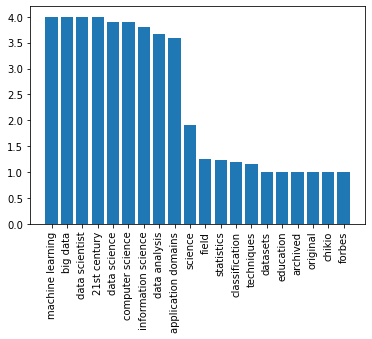

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Terdapat, bagaimanapun, cara yang lebih baik untuk memvisualisasikan kekerapan perkataan - menggunakan **Word Cloud**. Kita perlu memasang satu lagi perpustakaan untuk melukis word cloud daripada senarai kata kunci kita.


In [71]:
!{sys.executable} -m pip install wordcloud

Objek `WordCloud` bertanggungjawab untuk menerima sama ada teks asal, atau senarai perkataan yang telah dikira terlebih dahulu dengan kekerapan masing-masing, dan mengembalikan imej, yang kemudiannya boleh dipaparkan menggunakan `matplotlib`:


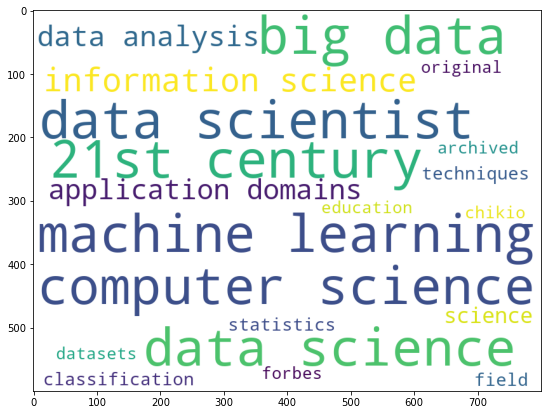

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Kita juga boleh masukkan teks asal ke dalam `WordCloud` - mari kita lihat jika kita dapat hasil yang serupa:


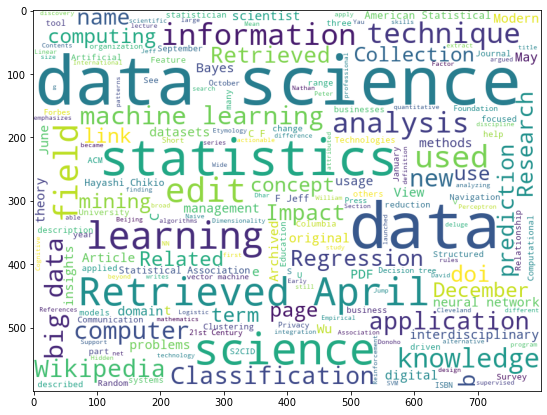

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Anda boleh lihat bahawa awan kata kini kelihatan lebih menarik, tetapi ia juga mengandungi banyak bunyi (contohnya, perkataan yang tidak berkaitan seperti `Retrieved on`). Selain itu, kita mendapat lebih sedikit kata kunci yang terdiri daripada dua perkataan, seperti *data scientist* atau *computer science*. Ini kerana algoritma RAKE melakukan kerja yang jauh lebih baik dalam memilih kata kunci yang berkualiti daripada teks. Contoh ini menggambarkan betapa pentingnya pra-pemprosesan dan pembersihan data, kerana gambaran yang jelas pada akhirnya akan membolehkan kita membuat keputusan yang lebih baik.

Dalam latihan ini, kita telah melalui proses mudah untuk mengekstrak beberapa makna daripada teks Wikipedia, dalam bentuk kata kunci dan awan kata. Contoh ini agak mudah, tetapi ia menunjukkan dengan baik semua langkah tipikal yang akan diambil oleh seorang saintis data semasa bekerja dengan data, bermula dari pemerolehan data hingga ke visualisasi.

Dalam kursus kita, kita akan membincangkan semua langkah tersebut dengan lebih terperinci.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat penting, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
